# Прогнозирование цен на акции на основе LSTM
___

**Импорт библиотек**

In [2]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Загрузка данных**

In [4]:
data = pd.read_csv('stock_prices.csv')
data.head()

,date,ticker,sector,open,high,low,close,volume
0,2019-01-01,A,Health Care,65.7833,66.9137,65.7833,66.8939,1572100.0
1,2019-01-01,AAL,Industrials,31.6955,32.2189,31.2905,31.7152,5334700.0
2,2019-01-01,AAP,Consumer Discretionary,155.8126,157.4401,154.7542,157.2205,752500.0
3,2019-01-01,AAPL,Information Technology,156.1761,156.9938,154.1566,155.3979,35003500.0
4,2019-01-01,ABBV,Health Care,84.3097,85.5891,83.9692,84.8528,5722100.0


**Обработка данных**

In [5]:
prices = data['close'].values.reshape(-1, 1)

In [6]:
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices)

In [7]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [8]:
seq_length = 60
X, y = create_sequences(scaled_prices, seq_length)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

**Создание LSTM**

In [17]:
model = models.Sequential()
model.add(layers.LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
model.add(layers.LSTM(50, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
3294/3294 [==============================] - 71s 21ms/step - loss: nan - val_loss: nan
Epoch 2/10
3294/3294 [==============================] - 70s 21ms/step - loss: nan - val_loss: nan
Epoch 3/10
3294/3294 [==============================] - 70s 21ms/step - loss: nan - val_loss: nan
Epoch 4/10
3294/3294 [==============================] - 69s 21ms/step - loss: nan - val_loss: nan
Epoch 5/10
3294/3294 [==============================] - 69s 21ms/step - loss: nan - val_loss: nan
Epoch 6/10
3294/3294 [==============================] - 70s 21ms/step - loss: nan - val_loss: nan
Epoch 7/10
3294/3294 [==============================] - 68s 21ms/step - loss: nan - val_loss: nan
Epoch 8/10
3294/3294 [==============================] - 69s 21ms/step - loss: nan - val_loss: nan
Epoch 9/10
3294/3294 [==============================] - 69s 21ms/step - loss: nan - val_loss: nan
Epoch 10/10
3294/3294 [==============================] - 69s 21ms/step - loss: nan - val_loss: nan


In [20]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


824/824 [==============================] - 4s 5ms/step


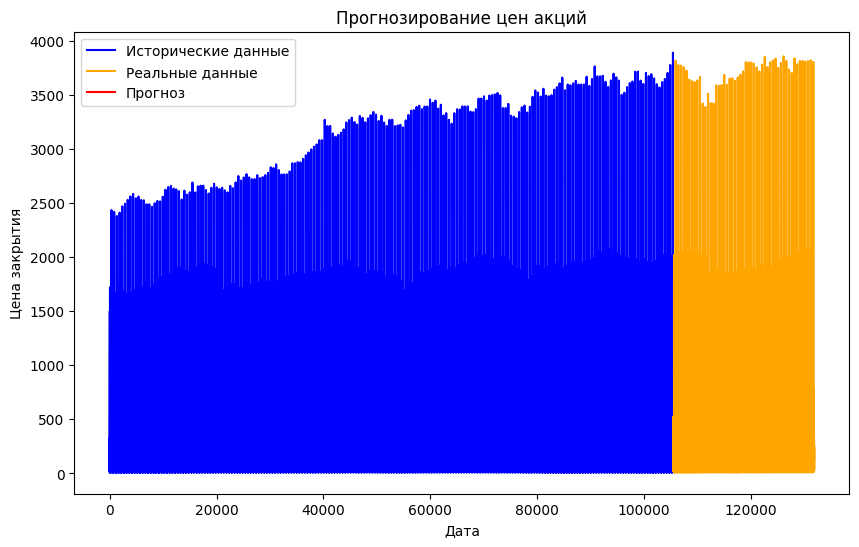

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(data.index[:len(data)-len(y_test)], scaler.inverse_transform(scaled_prices[:len(scaled_prices) - len(y_test)]), color='blue', label='Исторические данные')
plt.plot(data.index[len(data)-len(y_test):], scaler.inverse_transform(scaled_prices[len(scaled_prices)-len(y_test):]), color='Orange', label='Истинные данные')
plt.plot(data.index[len(data)-len(y_test):], predictions, color='red', label='Прогноз')
plt.title('Прогнозирование цен акций')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.legend()
plt.show()